# Часть 1. Исследование и обработка данных

###### Описание данных

In [250]:
#загрузка необходимых пакетов
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим данные и посмотрим на первые 10 строк.

In [251]:
df = pd.read_csv('HW1_var_14.csv', sep=';')
df.head(10)

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,14,1000014,Форма банка (без печати работодателя),Ремонт,1.0,0.48,женский,1,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,1000034,2НДФЛ,Другое,0.0,0.59,мужской,1,0,высшее,...,0.0,5.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,1000054,Форма банка (без печати работодателя),Ремонт,0.0,0.20,женский,0,0,среднее-специальное,...,1.0,7.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,1000074,Поступление зарплаты на счет,Ремонт,1.0,0.43,мужской,1,0,высшее,...,1.0,4.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,1000094,2НДФЛ,Покупка автомобиля,0.0,0.57,женский,0,0,высшее,...,0.0,3.0,86.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,14,1000114,Форма банка (без печати работодателя),Ремонт,0.0,0.21,женский,1,0,среднее-специальное,...,6.0,13.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,14,1000134,2НДФЛ,Покупка недвижимости/ строительство,0.0,0.57,мужской,1,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14,1000154,Поступление зарплаты на счет,Ремонт,0.0,0.35,мужской,0,0,высшее,...,1.0,41.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,14,1000174,Свободная форма с печатью работодателя,Ремонт,0.0,0.24,мужской,1,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14,1000194,2НДФЛ,Ремонт,1.0,0.11,женский,0,0,*n.a.*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
df.shape

(10242, 44)

In [253]:
df.dtypes.value_counts()

float64    31
object      9
int64       4
dtype: int64

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Номер варианта         10242 non-null  int64  
 1   ID                     10242 non-null  int64  
 2   INCOME_BASE_TYPE       10174 non-null  object 
 3   CREDIT_PURPOSE         10242 non-null  object 
 4   INSURANCE_FLAG         10240 non-null  float64
 5   DTI                    10114 non-null  float64
 6   SEX                    10242 non-null  object 
 7   FULL_AGE_CHILD_NUMBER  10242 non-null  int64  
 8   DEPENDANT_NUMBER       10242 non-null  int64  
 9   EDUCATION              10242 non-null  object 
 10  EMPL_TYPE              10234 non-null  object 
 11  EMPL_SIZE              10117 non-null  object 
 12  BANKACCOUNT_FLAG       7873 non-null   float64
 13  Period_at_work         7873 non-null   float64
 14  age                    7873 non-null   float64
 15  EM

Всего в датасете 44 переменных, из них 9 категориальных и 35 вещественных. Дано 10242 наблюдений.
В данных присутсвуют категориальные, вещественные, а также категориальные переменные, представленные в виде чисел. Посмотрим на характеристики переменных каждого типа. Для начала рассмотрим вещественные переменные:

In [255]:
#вещественные
num_features = ['DTI', 'Period_at_work', 'age', 'FULL_AGE_CHILD_NUMBER', 'max90days', 'max60days', 'max30days',
                'max21days', 'max14days', 'avg_num_delay', 'Active_to_All_prc', 'sum_of_paym_months',
                'min_MnthAfterLoan', 'max_MnthAfterLoan', 'num_AccountActive180', 'Active_not_cc', 'own_closed',
                'num_AccountActive90', 'num_AccountActive60', 'numAccountActiveAll', 'numAccountClosed']

#категориальные в виде чисел
cat_features_num = ['INSURANCE_FLAG', 'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'if_zalog', 
                'dlq_exist', 'thirty_in_a_year', 'all_credits', 
                'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

#категориальные
cat_features = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY',
                    'EMPL_FORM', 'FAMILY_STATUS']

df[num_features].describe()

,DTI,Period_at_work,age,FULL_AGE_CHILD_NUMBER,max90days,max60days,max30days,max21days,max14days,avg_num_delay,...,sum_of_paym_months,min_MnthAfterLoan,max_MnthAfterLoan,num_AccountActive180,Active_not_cc,own_closed,num_AccountActive90,num_AccountActive60,numAccountActiveAll,numAccountClosed
count,10114.000000,7873.000000,7873.000000,10242.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3653.000000,...,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000
mean,0.385615,64.522672,36.059825,0.572642,1.646485,1.177270,0.877373,0.655464,0.549513,0.062003,...,80.622647,13.670123,61.024284,0.388540,1.097408,0.716780,0.166985,0.102592,2.228922,3.512415
std,0.136346,65.088238,8.604664,0.806940,2.023144,1.638993,1.404508,1.209012,1.056882,0.114006,...,70.284014,14.707577,30.277838,0.678088,1.060432,1.093103,0.440141,0.341549,1.678510,3.196003
min,0.000000,4.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280000,19.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,31.000000,4.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.400000,43.000000,34.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.014706,...,62.000000,9.000000,65.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,0.490000,85.000000,42.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.071429,...,109.000000,17.000000,87.000000,1.000000,2.000000,1.000000,0.000000,0.000000,3.000000,5.000000
max,0.590000,460.000000,63.000000,21.000000,26.000000,26.000000,25.000000,25.000000,14.000000,0.987500,...,723.000000,107.000000,172.000000,5.000000,7.000000,13.000000,4.000000,3.000000,12.000000,30.000000


Категориальные переменные, которые представлены в виде чисел:

In [256]:
df[cat_features_num].describe()

,INSURANCE_FLAG,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,if_zalog,dlq_exist,thirty_in_a_year,all_credits,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
count,10240.000000,10242.000000,7873.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000
mean,0.610156,0.004198,0.387019,0.331514,0.571078,0.151432,5.741337,0.085130,0.066030,0.025921,0.013643,0.016917
std,0.487738,0.073164,0.876795,0.470822,0.494990,0.358519,4.042851,0.279113,0.248368,0.158921,0.116018,0.128977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Категориальные переменные в виде строк:

In [257]:
df[cat_features].describe()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,SEX,EDUCATION,EMPL_TYPE,EMPL_SIZE,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS
count,10174,10242,10242,10242,10234,10117,7873,3953,3953
unique,4,10,2,9,9,8,12,6,6
top,2НДФЛ,Ремонт,мужской,высшее,специалист,>250,Торговля,ООО,женат / замужем
freq,3217,5589,5682,5765,3750,6297,2227,2682,2227


Исходя из описания данных, мы можем определить *среднего клиента*: женатый мужчина 36 лет, имеющий высшее образование и являющийся специалистом в сфере торговли с зарплатой более 250 тысяч, работающий около 64 дней, имеет около 6 кредитов, из которых 1 закрыт, последний кредит был взят около 13 месяцев назад, задержек по выплатам нет, за последний месяц клиент выплатил 80 тысяч по кредитам, также клиент имеет 2 активных счета и 3 закрытых, сейчас клиент берет кредит на ремонт, кредит застрахован, без залога.

Оценим количество и долю уникальных, пустых и нулевых значений в данных. У большей части переменных наблюдается высокий процент пропущенных значений (более 60%). Наиболее высокая уникальность, не считая переменную *Номер варианта*, у переменной *avg_num_delay* (среднее количество задержки оплаты), у большинства переменных уникальность составляет менее 1%. Доля нулевых значений у большинства переменных находится в промежутке от 10% до 35%, у переменной *DEPENDANT_NUMBER* практически все значения нулевые.

In [258]:
pd.DataFrame(data={col : [len(df[col].unique()), len(df[col].unique()) / len(df) * 100, 
                          df[col].isna().sum(), df[col].isna().sum() / len(df),
                          len(df.loc[df[col]==0]), len(df.loc[df[col]==0]) / len(df)]
                   for col in df.columns}).rename(
    index={0 : 'unique', 1 : '%unique', 2: 'NAs', 3: '%NAs', 4: 'zero', 5: '%zero'}
                        ).T.astype({'unique': 'int32', 'NAs' : 'int32', 'zero': 'int32'})

,unique,%unique,NAs,%NAs,zero,%zero
Номер варианта,1,0.009764,0,0.000000,0,0.000000
ID,10242,100.000000,0,0.000000,0,0.000000
INCOME_BASE_TYPE,5,0.048819,68,0.006639,0,0.000000
CREDIT_PURPOSE,10,0.097637,0,0.000000,0,0.000000
INSURANCE_FLAG,3,0.029291,2,0.000195,3992,0.389768
DTI,61,0.595587,128,0.012498,3,0.000293
SEX,2,0.019527,0,0.000000,0,0.000000
FULL_AGE_CHILD_NUMBER,9,0.087873,0,0.000000,6016,0.587385
DEPENDANT_NUMBER,3,0.029291,0,0.000000,10205,0.996387
EDUCATION,9,0.087873,0,0.000000,0,0.000000


Рассмотрим распределение данных. Для начала рассмотрим распределение категориальных переменных:

1. Тип подтверждения дохода клиента (INCOME_BASE_TYPE)

<AxesSubplot:>

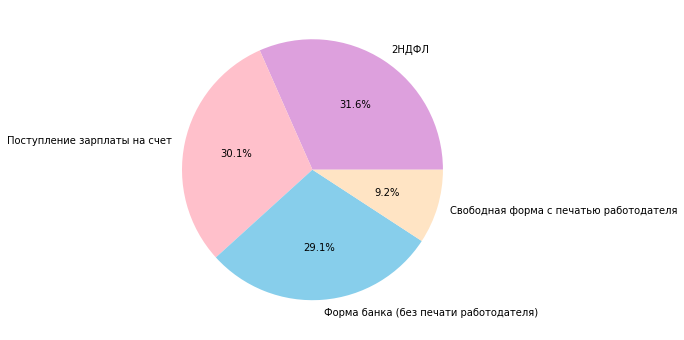

In [259]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['INCOME_BASE_TYPE'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(6,6))

2. Цель получения кредита (CREDIT_PURPOSE)

<AxesSubplot:>

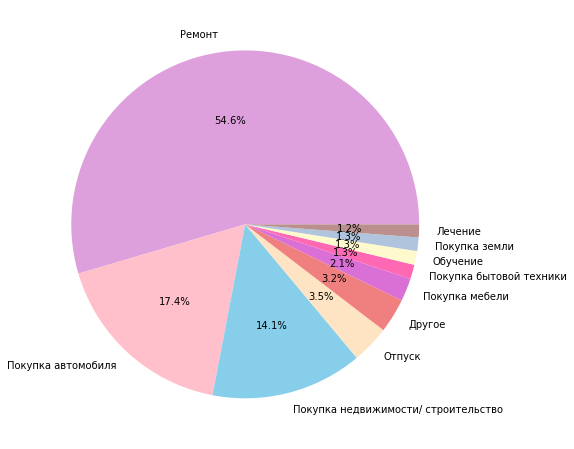

In [260]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['CREDIT_PURPOSE'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(8,8))

3. Пол (SEX)

<AxesSubplot:>

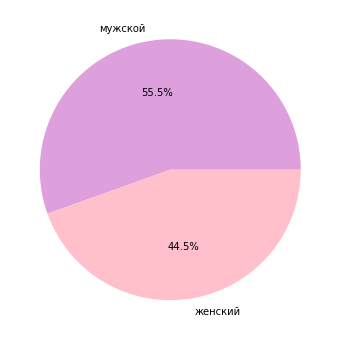

In [261]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['SEX'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(6,6))

4. Образование (EDUCATION)

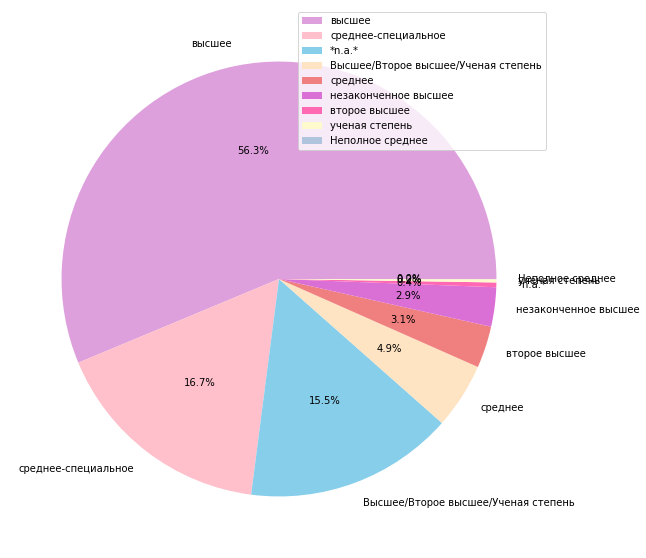

In [262]:
labels = df['EDUCATION'].unique()
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['EDUCATION'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(10,10))
plt.legend(labels)

5. Должность (EMPL_TYPE)

<AxesSubplot:>

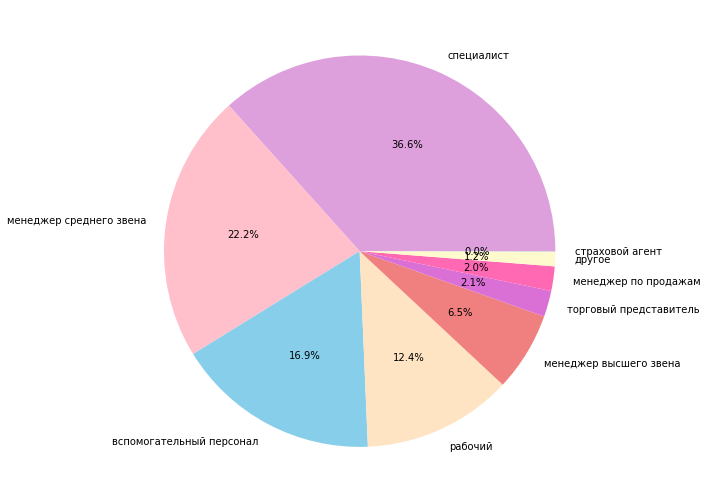

In [263]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['EMPL_TYPE'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(9,9))

6. Заработная плата (EMPL_SIZE)

<AxesSubplot:>

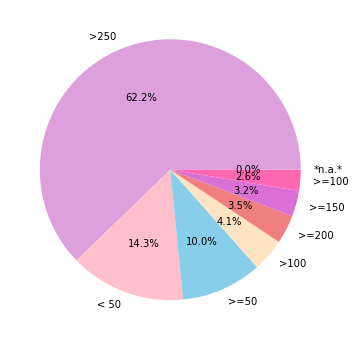

In [264]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['EMPL_SIZE'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(6,6))

7. Сфера бизнеса работадателя (EMPL_PROPERTY)

<AxesSubplot:>

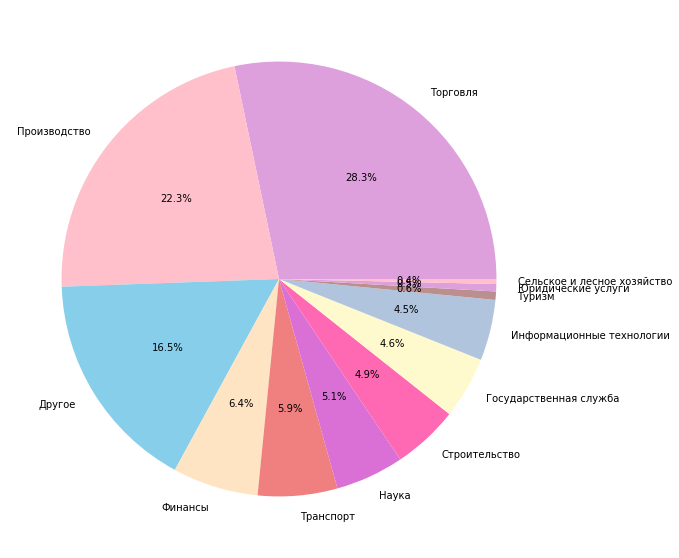

In [265]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['EMPL_PROPERTY'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(10,10))

8. Организационно-правовая форма (EMPL_FORM)

<AxesSubplot:>

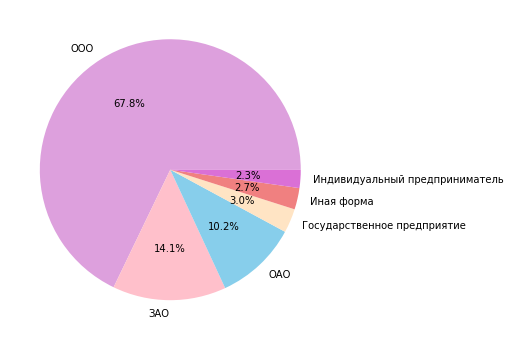

In [266]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['EMPL_FORM'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(6,6))

9. Семейный статус (FAMILY_STATUS)

<AxesSubplot:>

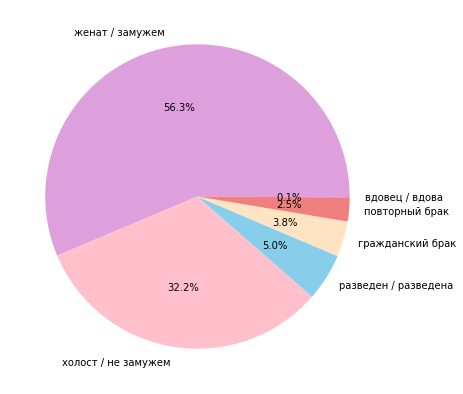

In [267]:
mycolors = ["plum", "pink", "skyblue", "bisque", "lightcoral", "orchid", "hotpink", "lemonchiffon", "lightsteelblue", "rosybrown"]
df['FAMILY_STATUS'].value_counts().plot(kind = 'pie', ylabel='', autopct='%1.1f%%', colors = mycolors, figsize=(7,7))

Категориальные переменные, которые представлены в датасете в виде чисел:

[]

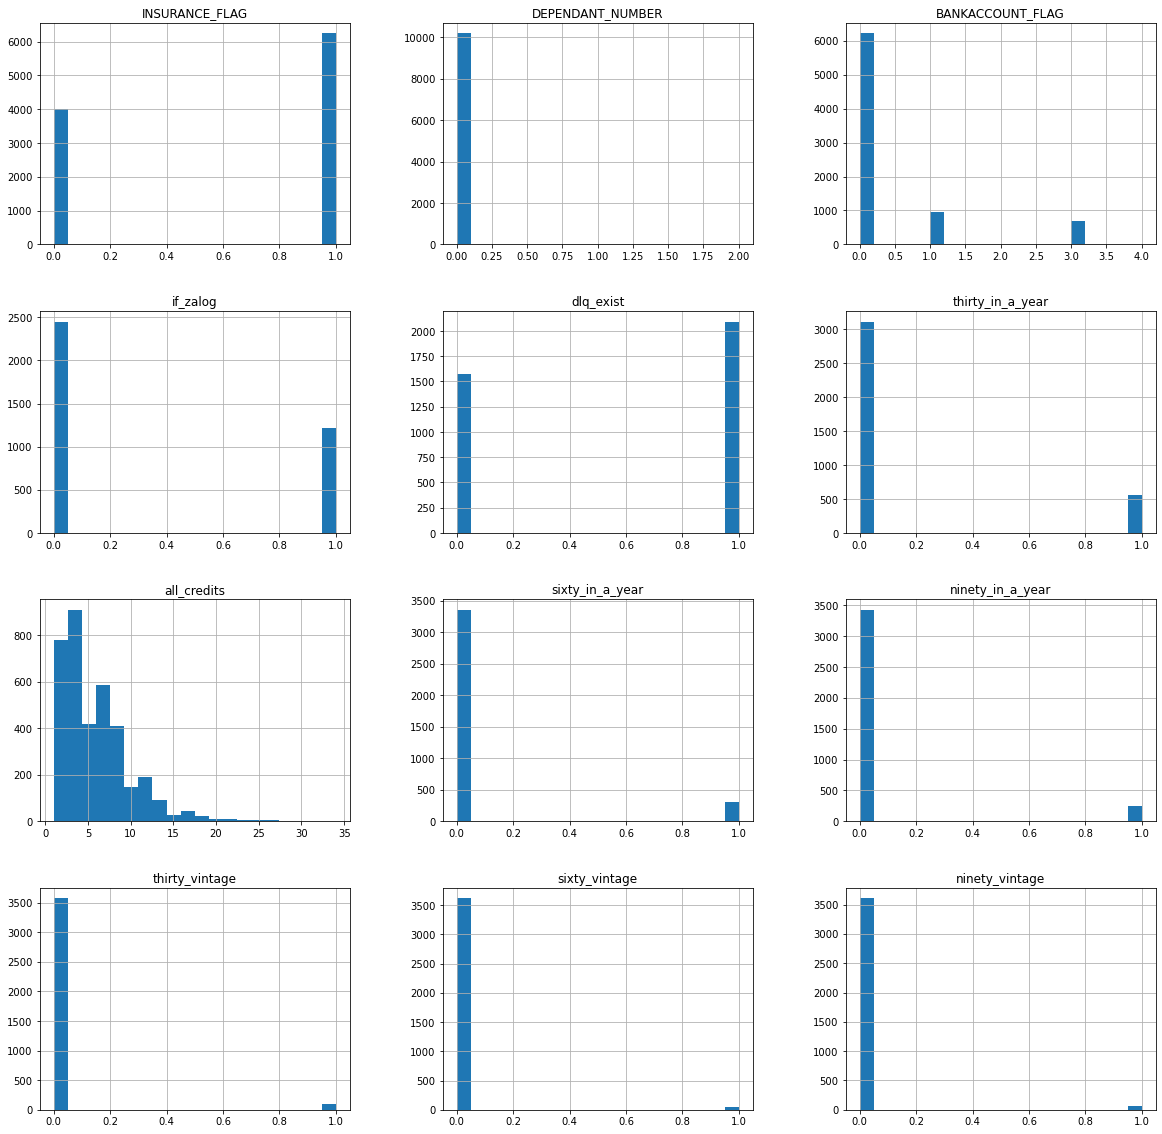

In [268]:
df[cat_features_num].hist(bins=20, figsize=(20, 20))
plt.plot()

Распределение числовых признаков:

[]

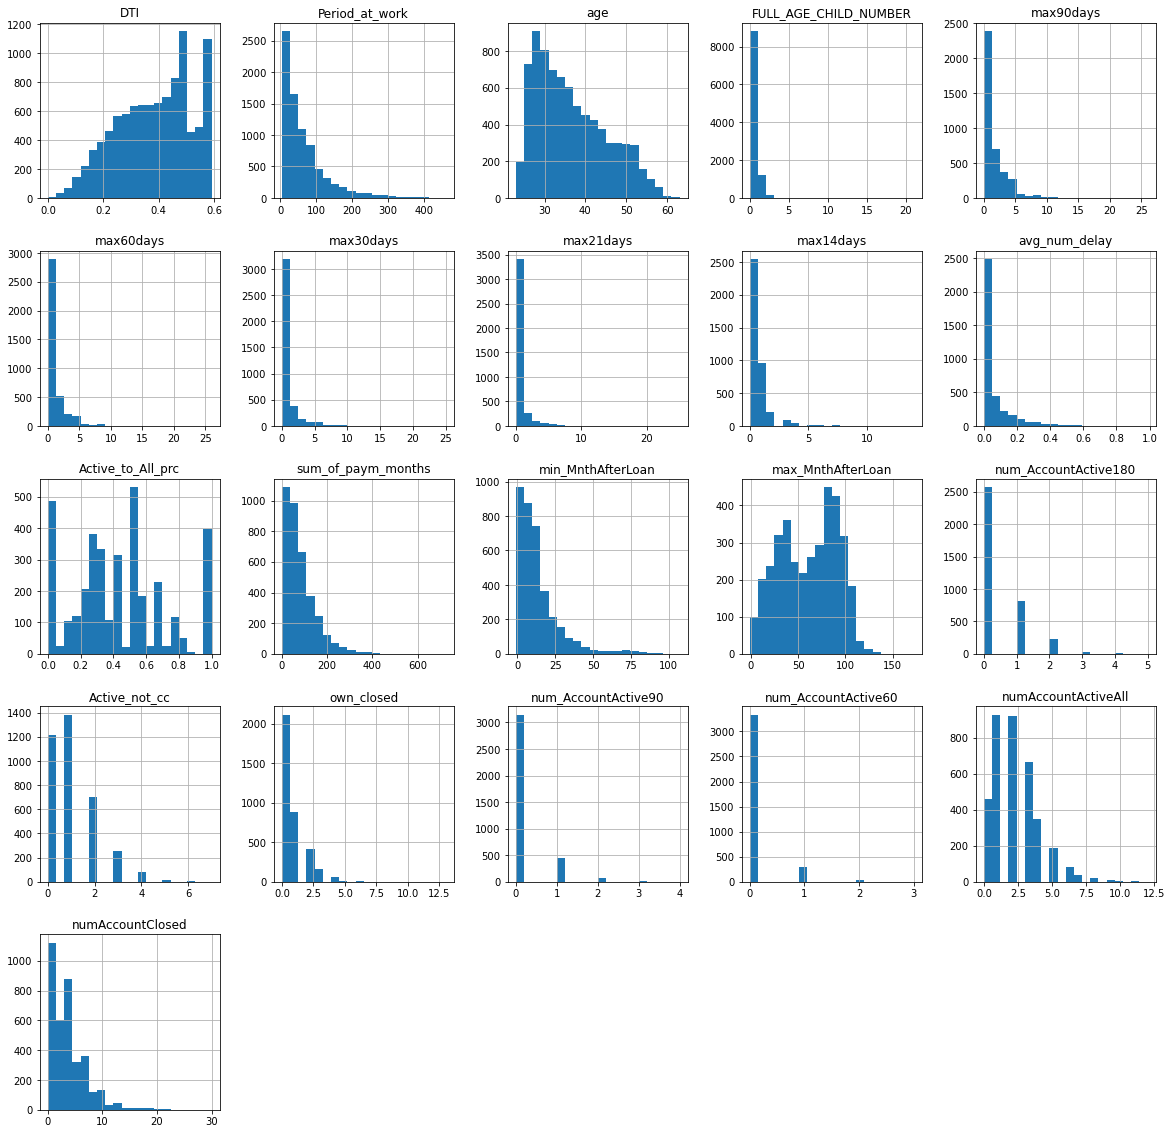

In [269]:
df[num_features].hist(bins=20, figsize=(20, 20))
plt.plot()

Построим корреляционную матрицу. Это поможет нам оценить то, насколько сильно коррелируют переменные между собой. Матрица может быть построена лишь для вещественных переменных.

<AxesSubplot:>

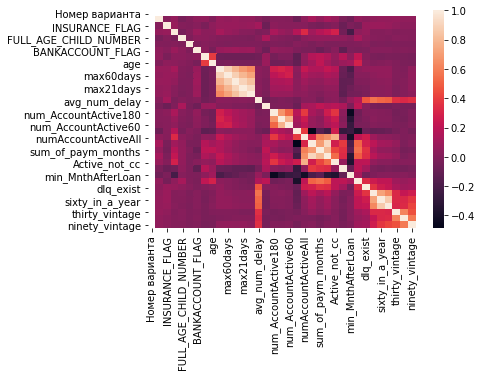

In [270]:
sns.heatmap(df.corr())

Исключим переменные "Номер варианта" и "ID". Значения "ID" уникальны для каждого клиента и не влияют на оставшиеся данные, значения "Номер варианта" так же не влияет на остальные данные.

In [271]:
df = df.drop(['Номер варианта'], axis=1, inplace=True)
df = df.drop(['ID'], axis=1, inplace=True)

Проверим коррекность данных. Для этого выведем уникальные значения каждой переменной.

In [272]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')
    print()

INCOME_BASE_TYPE: ['Форма банка (без печати работодателя)' '2НДФЛ'
 'Поступление зарплаты на счет' 'Свободная форма с печатью работодателя'
 nan]

CREDIT_PURPOSE: ['Ремонт' 'Другое' 'Покупка автомобиля'
 'Покупка недвижимости/ строительство' 'Покупка мебели' 'Лечение' 'Отпуск'
 'Обучение' 'Покупка земли' 'Покупка бытовой техники']

INSURANCE_FLAG: [ 1.  0. nan]

DTI: [0.48 0.59 0.2  0.43 0.57 0.21 0.35 0.24 0.11 0.3  0.56 0.15  nan 0.26
 0.14 0.41 0.37 0.18 0.16 0.36 0.32 0.4  0.34 0.33 0.45 0.39 0.07 0.23
 0.17 0.27 0.54 0.22 0.47 0.46 0.31 0.38 0.49 0.55 0.42 0.5  0.58 0.28
 0.44 0.29 0.19 0.52 0.09 0.51 0.25 0.53 0.1  0.12 0.08 0.13 0.06 0.04
 0.03 0.05 0.   0.02 0.01]

SEX: ['женский' 'мужской']

FULL_AGE_CHILD_NUMBER: [ 1  0  2  3  5  4  6 21  8]

DEPENDANT_NUMBER: [0 1 2]

EDUCATION: ['высшее' 'среднее-специальное' '*n.a.*'
 'Высшее/Второе высшее/Ученая степень' 'среднее' 'незаконченное высшее'
 'второе высшее' 'ученая степень' 'Неполное среднее']

EMPL_TYPE: ['специалист' 'менед

Из вывода уникальных значений переменных можно заметить, что пропущенные значения в колонках *EDUCATION*, *EMPL_SIZE* используется '*n.a.*' для обозначения пропущенных значений, а в переменных *min_MnthAfterLoan* и *max_MnthAfterLoan* найдено значение -1, которое является некорректным. Также у EMPL_SIZE есть неявный дубликат: >100 вместо >=100. У переменной *EDUCATION* есть значение 'Высшее/Второе высшее/Ученая степень', которое объединяет в себя несколько других значений.

Проверим полноту данных о клиентах, для этого выведем число людей с каждым возможным числом пропущенных значений.

In [273]:
df.isna().sum(axis=1).value_counts()

28    3793
0     3651
32    2374
21     234
31      66
30      55
26      54
1       12
29       1
5        1
2        1
dtype: int64

###### Подготовка данных для сегментации

Для начала исправим ошибки в данных, которые мы выявили при просмотре уникальных значений переменных. Значение -1 в переменных *min_MnthAfterLoan* и *max_MnthAfterLoan* невозможно восстановить верно, поэтому мы не будем далее использовать эти признаки.

In [274]:
#у EDUCATION и EMPL_SIZE заменяем '*n.a.*' на 'не указано', на эту же строку заменяем и все пропущенные значения в категориальных переменных
df['EDUCATION'] = df['EDUCATION'].replace('*n.a.*', 'не указано')
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('*n.a.*', 'не указано')
df[cat_features] = df[cat_features].fillna('не указано')

#у EMPL_SIZE заменяем '>100' на '>=100'
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>100', '>=100')

#у EDUCATION удалим лишние значения
df = df.query("EDUCATION not in ['высшее', 'второе высшее', 'ученая степень']") 

#у всех категориальных записанных в виде чисел переменных заменяем пропущенные значения на -1
df[cat_features_num] = df[cat_features_num].fillna(-1)

#у всех вещественных переменных заменяем пропуски на медиану
df[num_features] = df[num_features].fillna(value=df[num_features].median())

Выполним нормировку вещественных переменных. Нормировка позволить сравнить данные в разных единицах измерения между собой. Для нормировку будем использовать метод linear scaling. 

In [275]:
ss_dict = {}
for column in num_features:
    ss_dict[column] = (df[column].min(), df[column].max() - df[column].min())
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

Необходимо перевести стоковые категориальные значения в числовые. Заменим статус "не указано" на -1. Остальные значения мы закодируем, для этого присвоим различным значениям числа от 0.

In [277]:
df[cat_features] = df[cat_features].replace('не указано', -1)


df['INCOME_BASE_TYPE'] = df['INCOME_BASE_TYPE'].replace('Форма банка (без печати работодателя)', 0)
df['INCOME_BASE_TYPE'] = df['INCOME_BASE_TYPE'].replace('2НДФЛ', 1)
df['INCOME_BASE_TYPE'] = df['INCOME_BASE_TYPE'].replace('Поступление зарплаты на счет', 2)
df['INCOME_BASE_TYPE'] = df['INCOME_BASE_TYPE'].replace('Свободная форма с печатью работодателя', 3)

df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Ремонт', 0)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Покупка автомобиля', 1)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Покупка недвижимости/ строительство', 2)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Покупка мебели', 3)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Лечение', 4)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Отпуск', 5)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Обучение', 6)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Покупка земли', 7)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Покупка бытовой техники', 8)
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Другое', 9)
        
df['EDUCATION'] = df['EDUCATION'].replace('среднее-специальное', 0)
df['EDUCATION'] = df['EDUCATION'].replace('Неполное среднее', 1)
df['EDUCATION'] = df['EDUCATION'].replace('среднее', 2)
df['EDUCATION'] = df['EDUCATION'].replace('незаконченное высшее', 3)
df['EDUCATION'] = df['EDUCATION'].replace('Высшее/Второе высшее/Ученая степень', 4)        

df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('специалист', 0)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('менеджер высшего звена', 1)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('вспомогательный персонал', 2)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('менеджер среднего звена', 3)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('торговый представитель', 4)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('рабочий', 5)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('менеджер по продажам', 6)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('страховой агент', 7)
df['EMPL_TYPE'] = df['EMPL_TYPE'].replace('другое', 8)   
    
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Транспорт', 0)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Информационные технологии', 1)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Торговля', 2)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Производство', 3)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Строительство', 4)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Финансы', 5)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Наука', 6)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Государственная служба', 7)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Юридические услуги', 8)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Туризм', 9)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Сельское и лесное хозяйство', 10)
df['EMPL_PROPERTY'] = df['EMPL_PROPERTY'].replace('Другое', 11)

df['EMPL_FORM'] = df['EMPL_FORM'].replace('ЗАО', 0)
df['EMPL_FORM'] = df['EMPL_FORM'].replace('ООО', 1)
df['EMPL_FORM'] = df['EMPL_FORM'].replace('ОАО', 2)
df['EMPL_FORM'] = df['EMPL_FORM'].replace('Иная форма', 3)
df['EMPL_FORM'] = df['EMPL_FORM'].replace('Индивидуальный предприниматель', 4)
df['EMPL_FORM'] = df['EMPL_FORM'].replace('Государственное предприятие', 5)

df['FAMILY_STATUS'] = df['FAMILY_STATUS'].replace('женат / замужем', 0)
df['FAMILY_STATUS'] = df['FAMILY_STATUS'].replace('холост / не замужем', 1)
df['FAMILY_STATUS'] = df['FAMILY_STATUS'].replace('разведен / разведена', 2)
df['FAMILY_STATUS'] = df['FAMILY_STATUS'].replace('повторный брак', 3)
df['FAMILY_STATUS'] = df['FAMILY_STATUS'].replace('гражданский брак', 4)
df['FAMILY_STATUS'] = df['FAMILY_STATUS'].replace('вдовец / вдова', 5)
                                                  
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>250', 0)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('< 50', 1)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>=200', 2)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>=150', 3)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>=50', 4)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>=100', 5)
    
df['SEX'] = df['SEX'].replace('женский', 0)
df['SEX'] = df['SEX'].replace('мужской', 1)

Построим новую корреляционную матрицу, в которой можно увидеть уже все переменные:

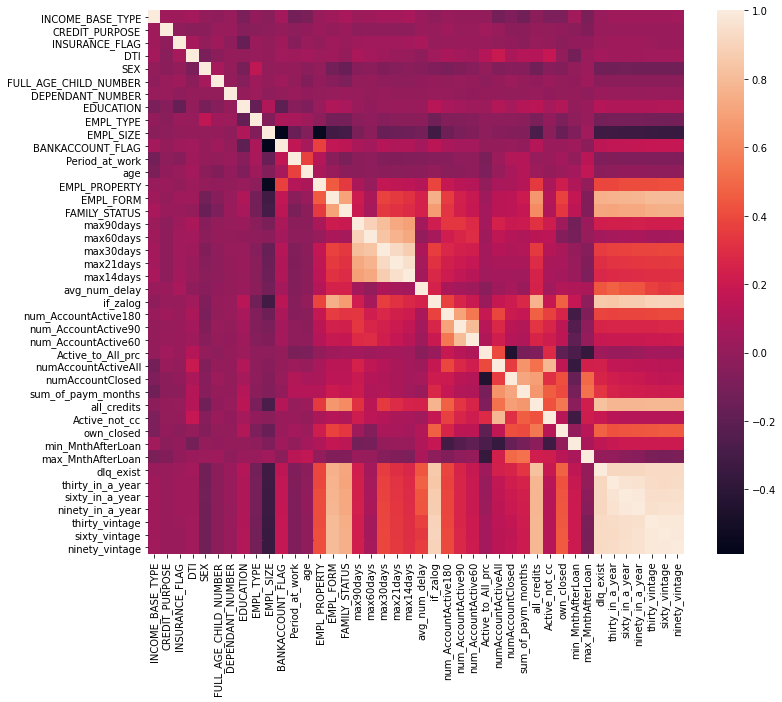

In [278]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.show()

Теперь можно удалить переменные, которые имеют некорректные данные (*min_MnthAfterLoan* и *max_MnthAfterLoan*) или же которые имеют много пропусков/одно преобладающее значение. Также удалим переменные, которые очень сильно влияют друг на друга (они непостредственно зависят друг от друга), но не практически влияют на остальные переменные.

In [279]:
df = df.drop(columns=['max14days', 'max21days', 'max30days', 'max60days', 'max90days', 'thirty_in_a_year', 'sixty_in_a_year',
                      'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage', 'min_MnthAfterLoan', 'max_MnthAfterLoan',
                      'DEPENDANT_NUMBER', 'Active_to_All_prc', 'all_credits', 'sum_of_paym_months', 'num_AccountActive60', 'num_AccountActive90'])

**Выводы:**
*   В датасете представлены данные по 10242 клиентам, дано 42 показателя, которые описывают клиентов, (не считая переменных "Номер варианта" и "ID")
*   Большая часть переменных имела большую долю пропущенных значений (более 60%) и невысокую уникальность (около 1%)
*   При помощи анализа данных был описан средний клиент: женатый мужчина 36 лет, имеющий высшее образование и являющийся специалистом в сфере торговли с зарплатой более 250 тысяч, работающий около 64 дней, имеет около 6 кредитов, из которых 1 закрыт, последний кредит был взят около 13 месяцев назад, задержек по выплатам нет, за последний месяц клиент выплатил 80 тысяч по кредитам, также клиент имеет 2 активных счета и 3 закрытых, сейчас клиент берет кредит на ремонт, кредит застрахован, без залога
*   При анализе значений переменных были выявлены ошибки, после чего они были исправлены (в двух переменных не удалось корректно восстановить данные, поэтому мы исключили их из анализа)
*   Была произведена замена пропусков вещественных переменных на медианное значение, пропуски в категориальных переменных заменены на -1, строковые категориальные переменные были закодированы и переведены в числовой формат
*   Были удалены некоторые переменные из датасета, которые имели некорректные данные или же которые имели много пропусков/одно преобладающее значение

# Часть 2. Сегментация

In [280]:
#загрузим недостающие библиотеки
from sklearn import tree

###### Сегментация методом k-means

Алгоритм k-means hазбивает множество элементов векторного пространства, стремясь минимизировать среднеквадратичное отклонение на точках каждого кластера. Такой метод позволяет охватить большой набор переменных, но все они должны быть вещественными, также необходимо заранее знать количество кластеров, поэтому до начала кластеризации нужно провести дополнительный анализ для определения оптимального количества групп.

In [284]:
#оставим только вещественные признаки
features = ['DTI', 'Period_at_work', 'age', 'FULL_AGE_CHILD_NUMBER', 'avg_num_delay', 
                'num_AccountActive180', 'Active_not_cc', 'own_closed', 'numAccountActiveAll', 'numAccountClosed']
data = df[features] 

Для выбора оптимального количества кластеров используем метод локтя.

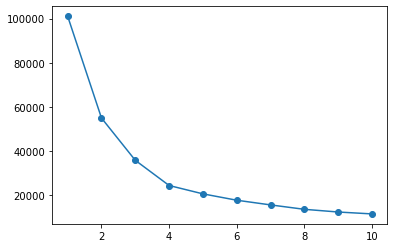

In [296]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.show()

Перегиб осуществляется при кол-ве кластеров = 3.

In [288]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
data['cluster'] = kmeans.labels_

<ipython-input-288-623f46759563>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


,DTI,Period_at_work,age,FULL_AGE_CHILD_NUMBER,avg_num_delay,num_AccountActive180,Active_not_cc,own_closed,numAccountActiveAll,numAccountClosed,cluster
2,0.338983,0.204846,0.400,0.000000,0.000000,0.0,0.166667,0.090909,0.090909,0.153846,1
5,0.355932,0.405286,0.325,0.047619,0.036458,0.0,0.500000,0.545455,0.363636,0.346154,1
6,0.966102,0.092511,0.325,0.047619,0.022368,0.0,0.166667,0.000000,0.181818,0.115385,0
9,0.186441,0.138767,0.725,0.000000,0.022368,0.0,0.166667,0.000000,0.181818,0.115385,1
11,0.813559,0.094714,0.275,0.095238,0.022368,0.0,0.166667,0.000000,0.181818,0.115385,0
...,...,...,...,...,...,...,...,...,...,...,...
10231,0.881356,0.339207,0.200,0.000000,0.078307,0.0,0.000000,0.000000,0.181818,0.461538,0
10233,0.423729,0.000000,0.175,0.000000,0.022368,0.0,0.166667,0.000000,0.181818,0.115385,1
10234,0.406780,0.013216,0.100,0.000000,0.033370,0.0,0.000000,0.000000,0.272727,0.115385,1
10236,1.000000,0.085903,0.600,0.047619,0.022368,0.0,0.166667,0.000000,0.181818,0.115385,2


Выведем средние показатели по каждому кластеру. Добавим некоторые категориальные переменные для описания групп.

In [340]:
data['SEX'] = df['SEX']
data['FAMILY_STATUS'] = df['FAMILY_STATUS']
data['EMPL_PROPERTY'] = df['EMPL_PROPERTY']
data['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE']
data['EMPL_SIZE'] = df['EMPL_SIZE']
print(data.groupby(by = 'cluster').mean())

              DTI  Period_at_work       age  FULL_AGE_CHILD_NUMBER  \
cluster                                                              
0        0.823858        0.094504  0.266626               0.031746   
1        0.430405        0.105230  0.286165               0.032967   
2        0.734501        0.248204  0.643194               0.017090   

         avg_num_delay  num_AccountActive180  Active_not_cc  own_closed  \
cluster                                                                   
0             0.042156              0.034645       0.193169    0.020566   
1             0.040589              0.015527       0.154202    0.023958   
2             0.038880              0.026889       0.177963    0.032626   

         numAccountActiveAll  numAccountClosed       SEX  FAMILY_STATUS  \
cluster                                                                   
0                   0.208395          0.126419  0.548634      -0.395628   
1                   0.170034          0.117138  

<ipython-input-340-b43518c7260a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SEX'] = df['SEX']
<ipython-input-340-b43518c7260a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FAMILY_STATUS'] = df['FAMILY_STATUS']
<ipython-input-340-b43518c7260a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

**Выводы:**
Разбиение получилось не совсем удачным, тк многие показатели внутри кластеров в среднем схожи. Всего у нас получилось 3 группы:
*  1 - клиенты с высоким отношением долга к доходам, работающие на производстве, имеющие зп <50 тысяч, берущие кредит на покупку мебели
*  2 - мужчины со средним отношением долга, работающие на производстве, имеющие зп <50 тысяч, берущие кредит на покупку недвижимости/строительство
*  3 - клиенты в возрасте (относительно других групп) с высоким отношением долга к доходам, работающие в сфере финансов, имеющие зп >250 тысяч, берущие кредит на покупку мебели

###### Сегментация методом дерева решений

Дерево решений - достаточно легкий и понятный даже не для подготовленной аудитории метод для проведения кластеризации. Однако необходимо контролировать точность модели, ведь модель может переобучиться, из-за чего есть риск получение некорректных данных.

Необходимо выбрать целевую переменную, выберем категориальную переменную с распределением, которое более всехо похоже на нормальное - EMPL_TYPE.

[]

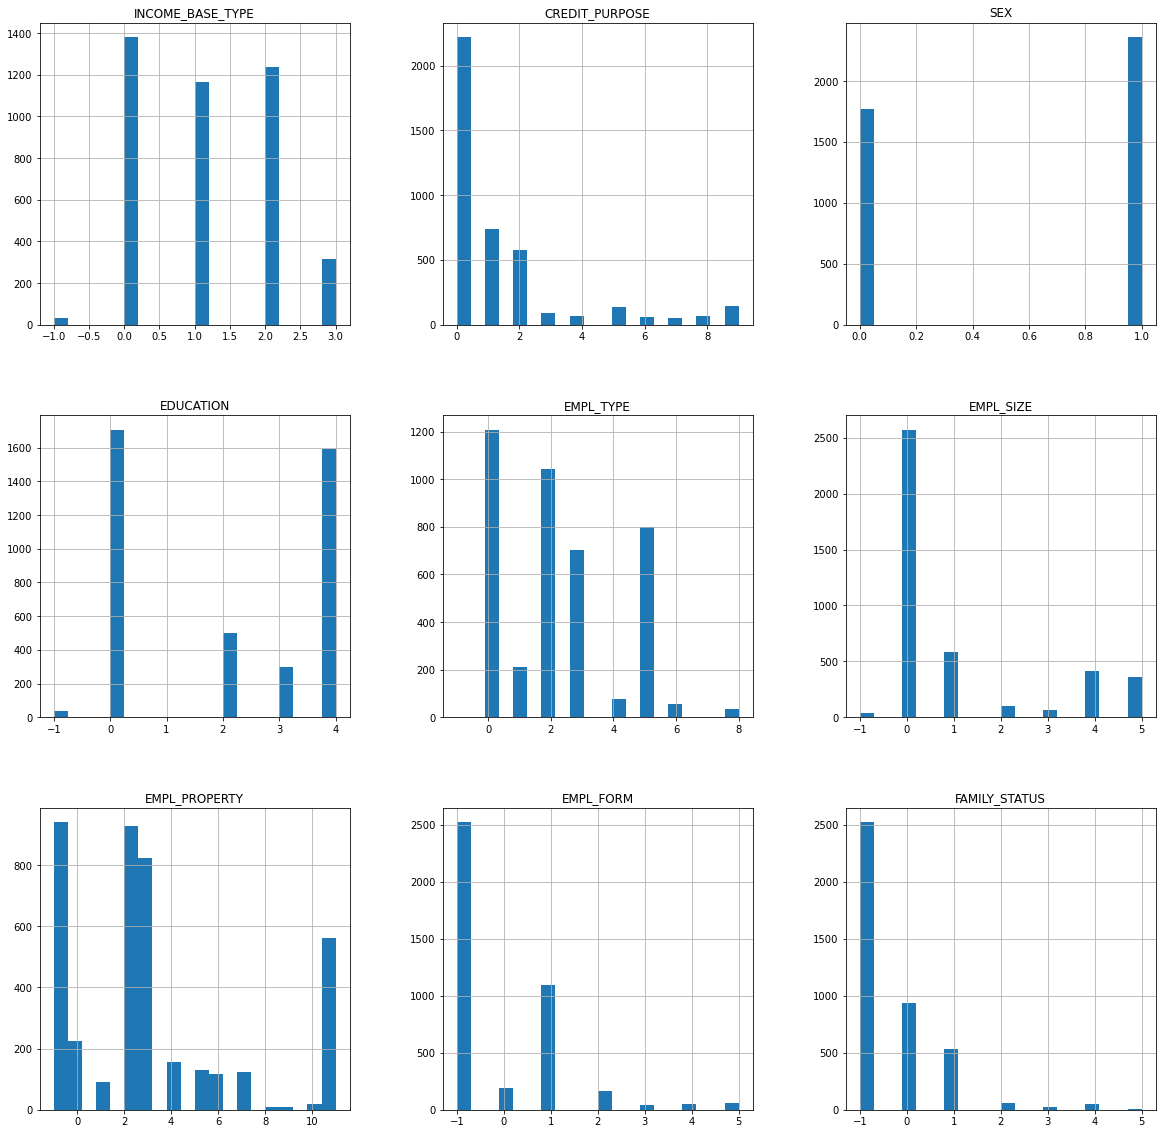

In [306]:
df[cat_features].hist(bins=20, figsize=(20, 20))
plt.plot()

In [326]:
cols = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'SEX',
       'FULL_AGE_CHILD_NUMBER', 'EDUCATION', 'DTI', 'EMPL_SIZE',
       'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'EMPL_PROPERTY',
       'EMPL_FORM', 'FAMILY_STATUS', 'avg_num_delay', 'if_zalog',
       'num_AccountActive180', 'numAccountActiveAll', 'numAccountClosed',
       'Active_not_cc', 'own_closed', 'dlq_exist']
X=df[cols]
y=df['EMPL_TYPE']

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X,y)

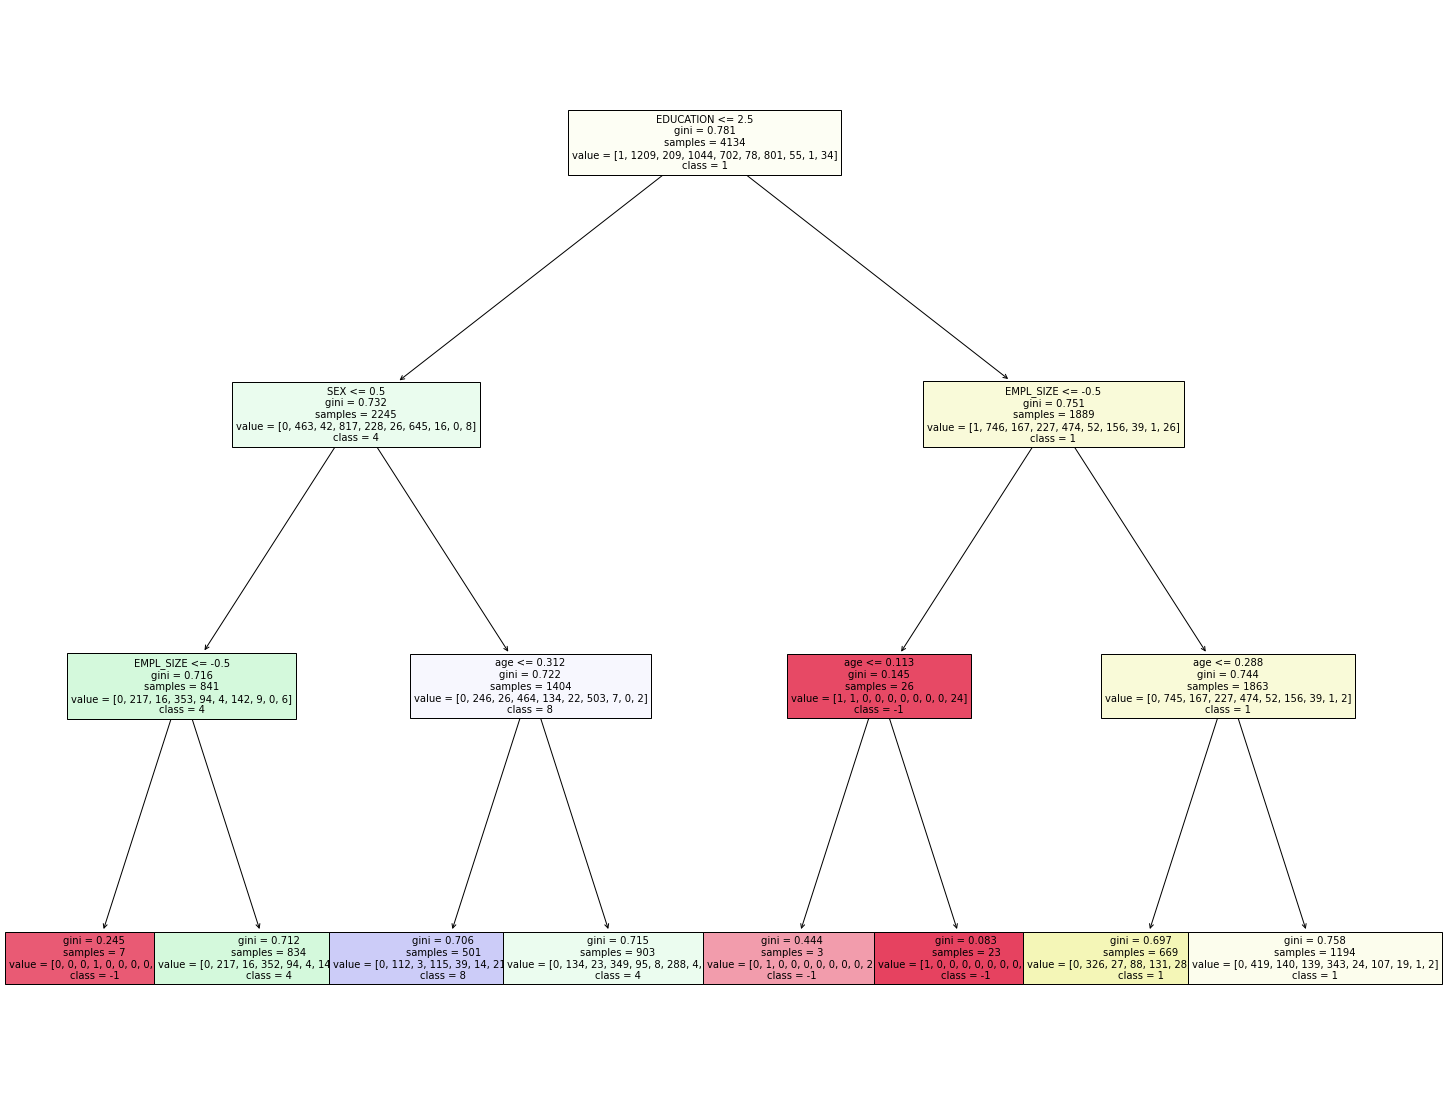

In [334]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names= y.unique().astype('str'),
                   filled=True, fontsize=10)


**Выводы:** Получили дерево решений с глубиной = 3 (тобы избежать слишком мелкого разбиения), в котором задействованы переменные EDUCATION, SEX, EMPL_SIZE, age и целевая переменная EMPL_TYPE. Получили следующие кластеры:
*  1 - женщины с образованием выше среднего, у которых не указана должность
*  2 - женщины с образованием выше среднего, работающие в качестве торгового представителя
*  3 - женщины среднего возраста и выше с образованием выше среднего, работающие торговым представителем
*  4 - молодые женщины с образованием выше среднего, работающие на должности, не указанной в изначальном списке
*  5 - молодые клиенты с образованием ниже высшего, у которых не указана должность
*  6 - клиенты среднего возраста и выше, у которых не указана должность
*  7 - молодые клиенты с образованием ниже высшего, работающие менеджером высшего звена
*  8 - клиенты среднего возраста и выше с образованием ниже высшего, работающие менеджером высшего звена